In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

ImportError: No module named 'pandas'

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [6]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [7]:
boston.data.shape

(506, 13)

In [10]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
bos = pd.DataFrame(boston.data)

In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
bos.columns = boston.feature_names

In [15]:
bos['PRICE'] = boston.target

In [16]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X = bos.drop('PRICE', axis = 1)

In [21]:
y = bos['PRICE']

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [20]:
# Creates linear regression object 
lm = LinearRegression()

In [24]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print 'Estimated intercept coefficient: ', lm.intercept_

Estimated intercept coefficient:  36.4911032804


In [26]:
print 'Estimated coefficients: ', lm.coef_

Estimated coefficients:  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [27]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'coefficients'])

,features,coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


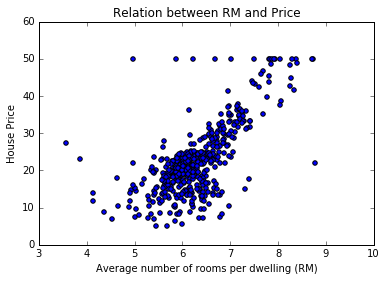

In [30]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('House Price')
plt.title('Relation between RM and Price')
plt.show()

In [31]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

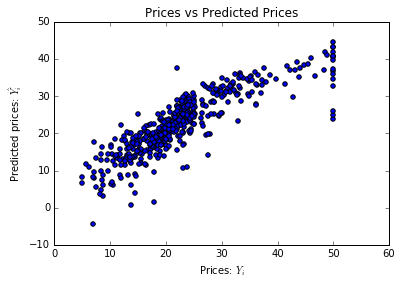

In [32]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y_i}$')
plt.title('Prices vs Predicted Prices')


In [34]:
# Mean square error
mseFull = np.mean((bos.PRICE - lm.predict(X))**2)
print mseFull

21.8977792177


In [40]:
# How NOT to do train-test split
X_train = X[:-50]
X_test = X[-50:]
Y_train = y[:-50]
Y_test = y[-50:]


In [ ]:
# How to do train-test split


In [53]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.30, random_state=5)

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [56]:
# MSE
print 'Find a model X_train, and calculate MSE with Y_train: ', np.mean((Y_train - lm.predict(X_train))**2)
print 'Find a model X_test, and calculate MSE with Y_test: ', np.mean((Y_test - lm.predict(X_test))**2)

Find a model X_train, and calculate MSE with Y_train:  19.0715279659
Find a model X_test, and calculate MSE with Y_test:  30.7032322072


In [58]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(Y_train, lm.predict(X_train))
print mean_squared_error(Y_test, lm.predict(X_test))

19.0715279659
30.7032322072


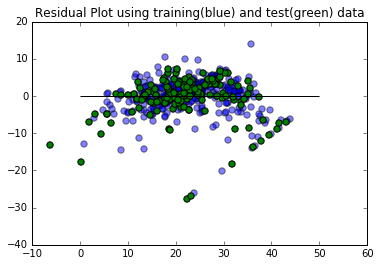

In [62]:
# Residual plot
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, s=40, c='b', alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, s=40, c='g')
plt.hlines(y = 0, xmin=0, xmax=50)
plt.title('Residual Plot using training(blue) and test(green) data')
plt.show()